In [66]:
import sqlite3
import pandas as pd
pd.set_option('display.max_colwidth', None)
# Connect to your SQLite database
conn = sqlite3.connect('mmlu_names_fwd_main8_instruct.db')

# Query the data from your SQLite database into a Pandas DataFrame
df = pd.read_sql_query("SELECT * FROM results", conn)

# Close the database connection
conn.close()
len(df)

709073

In [ ]:
import pandas as pd

# Assuming your dataframe is called 'df'

# Group by model_name and question_id, then count unique combinations of pre_cond_desc and post_cond_desc
condition_counts = df.groupby(['model_name', 'question_id']).apply(
    lambda x: len(x[['pre_cond_desc', 'post_cond_desc']].drop_duplicates())
).reset_index(name='condition_count')

# Get the maximum number of conditions per model
max_conditions = condition_counts['condition_count'].max()

# Filter out question_ids that don't have all conditions for each model_name
valid_question_ids = condition_counts[condition_counts['condition_count'] == max_conditions]

# Merge back with the original dataframe to filter rows
filtered_df = df.merge(valid_question_ids[['model_name', 'question_id']], on=['model_name', 'question_id'])

# Display the filtered dataframe
filtered_df


In [67]:
#df = filtered_df
df['is_correct'] = df['correct_answer'] == df['model_response']
df['model_response_len'] = df['model_response'].apply(len)

In [68]:
df.groupby(['model_name','pre_cond_desc', 'post_cond_desc'])['is_correct'].count()

model_name                       pre_cond_desc                  post_cond_desc
gemma2:9b-instruct-q4_K_M        answer_only_mmlu_orig          answer            14042
                                                                blank             14042
                                 answer_only_mmlu_orig_invert   answer            14042
                                                                blank             14042
                                 please_answer_mc_with_answers  answer            14042
                                                                blank              9427
llama2:7b-chat-q4_K_M            answer_only_mmlu_orig          answer            14042
                                                                blank             14042
                                 answer_only_mmlu_orig_invert   answer            14042
                                                                blank             14042
                                 please_a

In [69]:
df.groupby(['model_name','pre_cond_desc', 'post_cond_desc'])['is_correct'].mean()

model_name                       pre_cond_desc                  post_cond_desc
gemma2:9b-instruct-q4_K_M        answer_only_mmlu_orig          answer            0.711864
                                                                blank             0.711508
                                 answer_only_mmlu_orig_invert   answer            0.715212
                                                                blank             0.712434
                                 please_answer_mc_with_answers  answer            0.711580
                                                                blank             0.719529
llama2:7b-chat-q4_K_M            answer_only_mmlu_orig          answer            0.420168
                                                                blank             0.387836
                                 answer_only_mmlu_orig_invert   answer            0.411124
                                                                blank             0.392964
           

<Axes: ylabel='model_name,pre_cond_desc,post_cond_desc'>

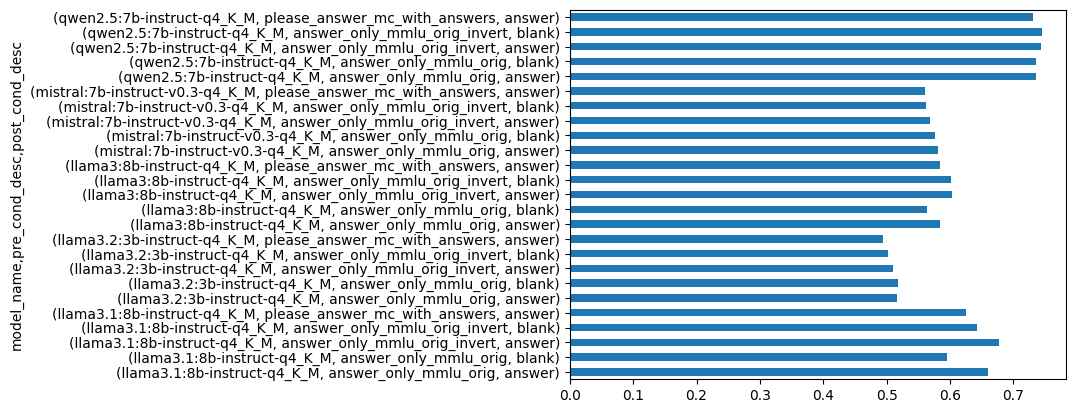

In [60]:
df.groupby(['model_name','pre_cond_desc', 'post_cond_desc'])['is_correct'].mean().plot(kind='barh')